In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

In [2]:
#Fourth order symplectic integrator with 15 steps
start_time  = time.time()
#initialize vectors 
N = 1000
h = 1

In [3]:
##============intialize empty vectors==============##
x1 = np.zeros(N, dtype='float')
x2 = np.zeros(N, dtype='float')
dx1 = np.zeros(N, dtype='float')
dx2 = np.zeros(N, dtype='float')

In [4]:
##====================To do list========================##
#Choose a chaotic and regular orbit and:
#1.) Compute the maximum Lyapunov exponents (its time evolution)
#2.) Compute the Relative Lyanpunov indicator
#The regular orbit for K=1.2 is (0.2, 0.1)
#The chaotic orbit for K=1.2 is (0.01, -0.02)

In [5]:
LCE = np.zeros(N, dtype='float')
vec = np.zeros(N, dtype='float')

In [6]:
#function for normalizing deviation vectors
def alpha(dx, dy):
    return np.linalg.norm([dx, dy])

In [7]:
x1_vals = [0.3, 0.01]
x2_vals = [0.1, -0.01]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10


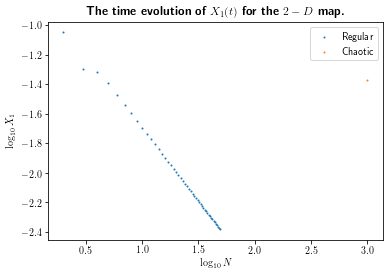

In [8]:

for idx in range(len(x1_vals)):
    #intial conditions 
    x1[0] = x1_vals[idx]
    x2[0] = x2_vals[idx]
    dx1[0] = 1
    dx2[0] = 0
    #renormalize the initial deviation vectors
    dx1[0] = dx1[0]/alpha(dx1[0], dx2[0])
    dx2[0] = dx2[0]/alpha(dx1[0], dx2[0])
    K =0.8#0.971635 #0.8
    for i in range(N-1):
        x1[i+1] = (x1[i] + x2[i] + (K/(2*np.pi))*np.sin(2*np.pi*x1[i+1]))%1
        x2[i+1] = (x2[i] + (K/(2*np.pi))*np.sin(2*np.pi*x1[i+1]))%1
    
        #handle the variational equations
        dx1[i+1] = ((1 + K*np.cos(2*np.pi*x1[i+1]))*dx1[i] + dx2[i])%1
        dx2[i+1] = (K*np.cos(2*np.pi*x1[i+1])*dx1[i] + dx2[i])%1
        
        #handle the computations of the mLCE
        for idx in range(1,i):
            if i ==0:
                vec[i] = np.log(alpha(dx1[idx], dx2[idx]))
                LCE[i] = (1/h)*(np.sum(vec))
            
            else:
                vec[i] = np.log(alpha(dx1[idx], dx2[idx]))
        
                LCE[i] = (1/(i*h))*(np.sum(vec))
                lyapunov = (1/(i*h))*(np.sum(np.log(alpha(dx1[idx], dx2[idx]))))
        #renormalize deviation vectors
        dx1[i+1] = dx1[i+1]/alpha(dx1[i+1], dx2[i+1])
        dx2[i+1] = dx2[i+1]/alpha(dx1[i+1], dx2[i+1])
    plt.grid()
    plt.scatter(np.log10(np.linspace(0, N, N)), np.log10(abs(LCE)), s=1)
    plt.title(r'\textbf{The time evolution of $X_{1}(t)$ for the $2-D$ map.}')
    plt.xlabel(r'$\log_{10}N$')
    plt.ylabel(r'$\log_{10}X_{1}$')
    plt.legend(['Regular', 'Chaotic'])


In [9]:
end_time = time.time() - start_time 
end_time/60

0.8744119326273601